In [1]:
import numpy as np
import pandas as pd
from numpy import linalg as la
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import csv
import io
from mpl_toolkits import mplot3d 
#import necessary libraries


In [2]:
data1=pd.read_csv("gg.csv") #and print the dataset given
data1.isnull().sum()
data1=data1.fillna(value = data1['radius_mean' ].mean())
data1=data1.fillna(value = data1['perimeter_mean' ].mean())
data1=data1.fillna(value = data1['concavity_mean' ].mean())
data1=data1.fillna(value = data1['compactness_se' ].mean())
data1=data1.fillna(value = data1['area_worst' ].mean())
data1=data1.fillna(value = data1['concavity_worst' ].mean())
data1.columns=["ID","Class","f1","f2","f3","f4","f5","f6","f7","f8","f9","f10","f11","f12","f13","f14","f15","f16","f17","f18","f19","f20","f21","f22","f23","f24","f25","f26","f27","f28","f29","f30"]
data1.pop("ID")
df = data1['Class']
data1.pop("Class")
data1=data1.sample(frac=1, axis=1)
data1=(data1-data1.mean())/data1.std()
data1.insert(30, 'Class',df, True)
print(data1)

          f22       f16        f1       f11       f25       f12        f4  \
0   -1.358098 -0.002013  1.102422  2.487545  1.306537 -0.564768  0.983510   
1   -0.368879 -0.062861  1.836635  0.498816 -0.375282 -0.875473  1.907030   
2   -0.023953 -0.017208  1.586206  1.227596  0.526944 -0.779398  1.557513   
3    0.133866  0.041203 -0.767260  0.326087  3.391291 -0.110312 -0.763792   
4   -1.465481 -0.043351  1.756953  1.269426  0.220362 -0.789549  1.824624   
..        ...       ...       ...       ...       ...       ...       ...   
564  0.117596 -0.036075  2.118368  2.779634  0.378033  0.070963  2.341795   
565  2.045599 -0.043994  1.711420  1.299356 -0.690623  2.258951  1.722326   
566  1.373645 -0.021861  0.706858  0.184730 -0.808876 -0.257145  0.577445   
567  2.235958  0.019206  1.845172  1.156917  1.429169  0.685485  1.733693   
568  0.763518 -0.077108 -1.808817 -0.070217 -1.857384  0.382756 -1.346604   

          f18       f28        f9  ...       f24        f7       f26  \
0  

In [3]:
def norm_pdf(x, loc=0, scale=1):
    """PDF for the normal distribution."""
    z = (x - loc) / scale
    pdf = np.exp(-0.5 * z ** 2) / (np.sqrt(2 * np.pi) * scale)
    return pdf

In [4]:
dataset = np.array(data1)
np.random.shuffle(dataset) #shuffling to avoid bias
size_train=int(dataset.shape[0]*0.67)  #Training data size 70% of total
size_test=int(dataset.shape[0]-size_train) #Testing data size 30% of total
train_data = dataset[:size_train,:]
test_data = dataset[size_test:,:]
train_data = pd.DataFrame(train_data,columns =["f1","f2","f3","f4","f5","f6","f7","f8","f9","f10","f11","f12","f13","f14","f15","f16","f17","f18","f19","f20","f21","f22","f23","f24","f25","f26","f27","f28","f29","f30","Class"])
test_data = pd.DataFrame(test_data,columns =["f1","f2","f3","f4","f5","f6","f7","f8","f9","f10","f11","f12","f13","f14","f15","f16","f17","f18","f19","f20","f21","f22","f23","f24","f25","f26","f27","f28","f29","f30","Class"])
mean1 = train_data.groupby("Class").mean()   #classifying into two classes and finding the mean
mean1

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30
Class,,,,,,,,,,,,,,,,,,,,,
0.0,-0.345888,0.051647,-0.570718,-0.434428,-0.334953,0.071361,-0.555381,-0.322393,-0.640683,-0.204206,...,-0.426561,-0.577693,-0.114672,-0.472171,-0.330693,-0.606713,-0.316700,-0.045663,-0.200859,-0.263075
1.0,0.590807,-0.031824,0.895490,0.610593,0.597391,-0.064257,0.853818,0.504195,1.020378,0.412926,...,0.614962,0.863136,0.079481,0.799800,0.581812,0.977741,0.517415,0.100909,0.324963,0.490327


In [5]:
mean_vector = mean1.iloc[0]-mean1.iloc[1]
mean_vector

f1    -0.936694
f2     0.083470
f3    -1.466208
f4    -1.045021
f5    -0.932344
f6     0.135618
f7    -1.409199
f8    -0.826589
f9    -1.661061
f10   -0.617132
f11   -1.577407
f12   -1.555202
f13    0.010574
f14   -0.000153
f15   -0.996501
f16    0.173096
f17   -0.749591
f18   -0.477196
f19   -1.485735
f20   -1.249332
f21   -1.041523
f22   -1.440828
f23   -0.194153
f24   -1.271971
f25   -0.912505
f26   -1.584453
f27   -0.834115
f28   -0.146572
f29   -0.525821
f30   -0.753402
dtype: float64

In [6]:
points = train_data.groupby('Class')
positive_points = points.get_group(1)  #positive as class 1
negative_points = points.get_group(0)  #negative as class 0
del positive_points['Class']
del negative_points['Class']
pos_diff = positive_points - mean1.iloc[1]  #(xn-M1)  M1 is mean vector for all points of class 1
neg_diff = negative_points - mean1.iloc[0]  #(xn-M2)  M2 is mean vector for all points of class 0
pos_diff = pos_diff.values
neg_diff = neg_diff.values
N1 = len(positive_points)
N2 = len(negative_points)
print(N1)
print(N2)
print(pos_diff)
print(neg_diff)

144
237
[[ 4.49302315e-01 -1.80588169e-02  1.09197160e+00 ... -7.01763743e-01
  -3.26410782e-01 -1.02715583e+00]
 [ 1.50197540e+00 -1.90740755e-02  1.38633260e-01 ... -5.69114240e-01
  -1.56796068e-01 -1.13598679e-01]
 [-1.87080870e+00 -1.47626109e-03  5.48426456e-01 ... -2.64511676e-01
   5.75412765e-02 -1.67716559e+00]
 ...
 [ 2.42672512e-01 -2.28643739e-02 -9.34228094e-01 ... -4.59517784e-01
  -6.57689521e-01  7.03066050e-01]
 [ 1.20423325e+00 -1.44241914e-03 -5.58584331e-01 ... -4.13789607e-01
  -1.96880795e-01  3.29891794e-01]
 [ 9.13609244e-02 -3.51828440e-02 -1.09074633e+00 ... -8.29122383e-01
  -6.68952998e-01 -1.05705407e+00]]
[[-1.23348361 -0.11076801 -0.19938754 ... -0.554814   -0.35415635
   0.33417666]
 [ 0.2617352  -0.11222321  0.38399861 ... -0.71316198 -0.35581274
   0.41279794]
 [-0.07668211 -0.12308986  0.13356943 ... -0.62699649 -0.79409451
  -0.82410308]
 ...
 [ 2.39962151 -0.12161774 -0.25914905 ... -0.71845285 -0.85571236
  -1.11533402]
 [ 2.48259883 -0.09572526 -

In [7]:
sum_pos=np.zeros((30,30))   #to find Sw matrix -> within covariance matrix
sum_neg=np.zeros((30,30))

for i in range(len(pos_diff)):
  sum_pos= np.dot(pos_diff[i].reshape(30,1),pos_diff[i].reshape(1,30)) + sum_pos
for i in range(len(neg_diff)):
  sum_neg= np.dot(neg_diff[i].reshape(30,1),neg_diff[i].reshape(1,30)) + sum_neg

#summation of (xn-M1)^2 = sum_pos
#summation of (xn-M2)^2 = sum_neg

covariance_matrix = sum_pos/N1 + sum_neg/N2  
covariance_matrix


array([[ 1.71072631e+00, -1.32825708e-01, -1.41199298e-01,
        -2.42839193e-01,  2.35350223e-01,  8.17367971e-01,
        -1.50673968e-01, -2.35440046e-01,  3.53134655e-02,
        -1.38245845e-01, -2.04478031e-02, -2.87788547e-02,
        -2.78188064e-01, -3.41697985e-02, -2.22230329e-01,
        -5.86034043e-02, -1.95994288e-01,  6.62137238e-02,
        -1.37707266e-01, -1.25583611e-02, -2.22861928e-01,
        -2.98470466e-02, -7.71758854e-03,  3.10578752e-01,
         1.23788574e-01, -1.51135452e-01,  1.52554983e+00,
        -9.09933822e-02, -5.57318082e-02,  2.83331776e-01],
       [-1.32825708e-01,  2.39144698e+00,  5.27336696e-02,
         1.06267142e-01,  7.30320081e-02,  2.63904154e-01,
         3.93656746e-02,  3.42786869e-01,  6.07444775e-02,
         1.02068384e-01,  2.78277744e-02,  2.74426754e-02,
        -2.13983712e-02,  5.64376455e-02,  5.91586666e-02,
         1.12808640e-01,  2.43589860e-01,  7.75014025e-03,
         5.50646164e-02,  6.80212156e-02,  1.20492579e-

In [8]:
covariance_inverse = np.linalg.inv(covariance_matrix)   #finding Sw inverse
covariance_inverse

array([[ 8.70460393e+00,  3.09331708e-01,  1.79983946e+00,
         1.62653641e+00, -1.19207039e+00, -2.84971625e+00,
         1.65973283e-01,  4.94501212e-01, -1.38593108e+00,
         7.90043336e-01, -1.74364610e+00, -3.55194608e-01,
         1.65012177e+00,  5.67879135e-01, -2.00608017e+00,
         5.16276127e-01,  1.53679633e-01,  4.86557103e-01,
         2.58347666e-01,  4.41510205e-01,  1.42939042e-01,
         6.34510625e-01,  4.71101699e+00, -2.57221415e-01,
        -1.90048206e+00, -6.00981292e-02, -6.48380589e+00,
        -1.52675812e-01, -4.60965792e-01,  3.34325035e-02],
       [ 3.09331708e-01,  4.87910469e-01, -3.38424339e-01,
         6.36787285e-02, -2.74278866e-02, -1.99236095e-01,
         2.86280235e-01, -3.21705833e-01,  2.87317707e-01,
         5.11759006e-02,  2.40918216e-01, -9.79388263e-02,
         2.01037439e-01, -4.81449526e-03, -8.71329783e-02,
         6.39588222e-02, -1.29212914e-01,  1.56983889e-02,
        -5.38885002e-03,  3.43683081e-01, -1.65209696e-

In [9]:
mean_vector  # M1-M2

f1    -0.936694
f2     0.083470
f3    -1.466208
f4    -1.045021
f5    -0.932344
f6     0.135618
f7    -1.409199
f8    -0.826589
f9    -1.661061
f10   -0.617132
f11   -1.577407
f12   -1.555202
f13    0.010574
f14   -0.000153
f15   -0.996501
f16    0.173096
f17   -0.749591
f18   -0.477196
f19   -1.485735
f20   -1.249332
f21   -1.041523
f22   -1.440828
f23   -0.194153
f24   -1.271971
f25   -0.912505
f26   -1.584453
f27   -0.834115
f28   -0.146572
f29   -0.525821
f30   -0.753402
dtype: float64

In [10]:

wt_vector = np.dot(covariance_inverse,mean_vector)/(la.norm(np.dot(covariance_inverse,mean_vector)))

wt_vector   # w = (inverse of Sw)(M1-M2)

array([-0.06766861,  0.01361506, -0.28541677, -0.12680952, -0.03899335,
        0.01031967,  0.30068203, -0.03876336, -0.09263084,  0.01462691,
       -0.00116961, -0.43892034, -0.02169764,  0.03666537,  0.04979236,
       -0.04110661,  0.00846087, -0.17890894, -0.02220718,  0.17299163,
        0.01794098,  0.31088569, -0.64223521,  0.03404948, -0.0541828 ,
       -0.08455165,  0.00470958, -0.01024044,  0.08654146, -0.07696888])

In [11]:
positive_points = positive_points.values
negative_points = negative_points.values
projected_pos_pts = np.dot(positive_points,wt_vector)  #projecting points belonging to class1 on w vector
projected_neg_pts = np.dot(negative_points,wt_vector)  #projecting points belonging to class0 on w vector

In [12]:
projected_pos_pts.shape
# print(projected_pos_pts)
projected_neg_pts.shape

(237,)

In [13]:
arrp = np.zeros((len(projected_pos_pts),1))
print(arrp)
arrn = np.zeros((len(projected_neg_pts),1))
print(arrn)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0

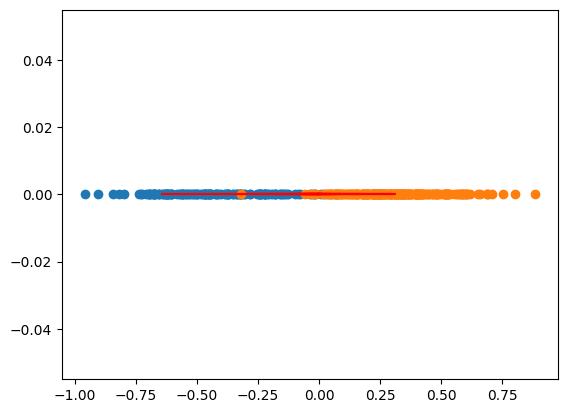

In [14]:
plt.scatter(projected_pos_pts,arrp)
plt.scatter(projected_neg_pts,arrn)
plt.plot(wt_vector,[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],'r')
plt.show()

In [15]:
final_positive_mean = projected_pos_pts.mean()
print(final_positive_mean)
final_negative_mean = projected_neg_pts.mean()
print(final_negative_mean)
final_positive_std = projected_pos_pts.std()
final_negative_std = projected_neg_pts.std()

-0.423705444714111
0.31434622913972177


In [16]:
def solve(m1,m2,std1,std2):
  a = 1/(2*std1**2) - 1/(2*std2**2)
  b = m2/(std2**2) - m1/(std1**2)
  c = m1**2 /(2*std1**2) - m2**2 / (2*std2**2) - np.log(std2/std1)
  return np.roots([a,b,c])
result = solve(final_positive_mean,final_negative_mean,final_positive_std,final_negative_std)
result = result[1]

result #discriminant point to separate both positive and negative classes

-0.024402653952999953

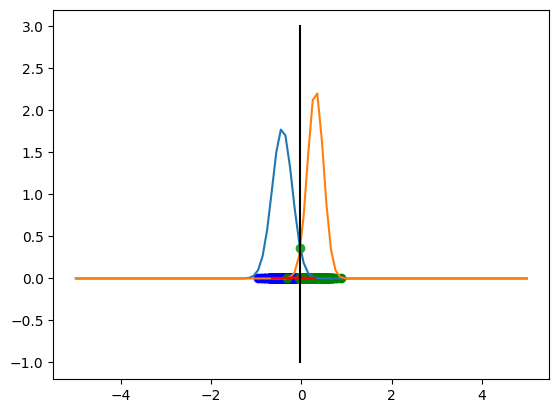

In [17]:
x = np.linspace(-5, 5, 100)
ptemp = np.zeros((len(projected_pos_pts),1))
ntemp = np.zeros((len(projected_neg_pts),1))
plt.plot(x, norm_pdf(x, final_positive_mean, final_positive_std))
plt.plot(x,norm_pdf(x,final_negative_mean,final_negative_std))
plt.plot(result,norm_pdf(result,final_positive_mean,final_positive_std),'o')
a=plt.scatter(projected_pos_pts,ptemp,color = 'b')
b=plt.scatter(projected_neg_pts,ntemp,color = 'g')
plt.plot(wt_vector,[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],'r')
# plt.legend(loc='upper left',ncol=3,fontsize=11)
plt.plot([result] * 2, [-1, 3], color='black', label="discriminant line")
plt.show()

In [18]:
points = test_data.groupby('Class')
positive_points = points.get_group(1)  #positive as class 1
negative_points = points.get_group(0)
del positive_points['Class']
del negative_points['Class']
positive_points = positive_points.values
negative_points = negative_points.values
projected_pos_pts = np.dot(positive_points,wt_vector)  #projecting points belonging to class1 on w vector
projected_neg_pts = np.dot(negative_points,wt_vector)  #projecting points belonging to class0 on w vector
pred_pos_dataset = pd.DataFrame(projected_pos_pts)
pred_neg_dataset = pd.DataFrame(projected_neg_pts)

pred_pos_dataset

,0
0,-0.223072
1,-0.903261
2,-0.280770
3,-0.472234
4,-0.670556
...,...
136,-0.410140
137,-0.212738
138,-0.290869
139,-0.421821


In [19]:
pred_neg_dataset

,0
0,0.425541
1,0.326540
2,0.535387
3,0.589986
4,0.562656
...,...
235,0.561573
236,0.618763
237,0.391890
238,0.058435


In [20]:
pred_pos_dataset = pred_pos_dataset.values
pred_neg_dataset = pred_neg_dataset.values

# ptemp is an array of zeros which will represent the predicted class for the positive pts.So, appended to the predicted positive dataset
ptemp = np.zeros((len(pred_pos_dataset),1))
ntemp = np.zeros((len(pred_neg_dataset),1))
pred_pos = np.append(pred_pos_dataset, ptemp, axis=1)
pred_neg = np.append(pred_neg_dataset, ntemp, axis=1)

In [21]:
tpos=0 #true positive
tneg=0 #true negative
fpos=0 #false positive
fneg=0 #false negative
for i in range(len(pred_pos_dataset)):
  if pred_pos[i,0]>=result:
    pred_pos[i,1] = 0
    fneg=fneg+1
  else:
    pred_pos[i,1] = 1
    tpos=tpos+1

for i in range(len(pred_neg_dataset)):
  if pred_neg[i,0]>=result:
    pred_neg[i,1] = 0
    tneg=tneg+1
  else:
    pred_neg[i,1] = 1
    fpos=fpos+1

In [22]:
test_accuracy = (tpos+tneg)/(tpos+tneg+fpos+fneg)
precision = tpos / (tpos + fpos)
recall = tpos / (tpos + fneg)
print(test_accuracy*100)
print(precision)
print(recall)

96.58792650918635
0.9444444444444444
0.9645390070921985
